# Look at syllable usages and changes in klothos experiment

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from aging.behavior.syllables import compute_usage, relabel_by_usage
from aging.plotting import figure
import colorcet as cc

In [3]:
def get_ont_map():
    df = pd.read_parquet(
        "/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_syllable_df_v00.parquet"
    )
    _, umap = relabel_by_usage(df, return_map=True)
    return umap

In [4]:
umap = get_ont_map()

In [5]:
ont_usage_mtx = pd.read_parquet("/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_clean_v2.parquet")

In [6]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_08/klothos_syllable_df_v00.parquet')

In [7]:
df['relabeled_syllables'] = df['syllables'].map(umap)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726883 entries, 0 to 1726882
Data columns (total 34 columns):
 #   Column               Dtype         
---  ------               -----         
 0   experiment           string        
 1   file                 string        
 2   syllables            int16[pyarrow]
 3   date                 datetime64[us]
 4   uuid                 string        
 5   age                  int64         
 6   true_depth           float[pyarrow]
 7   session_name         string        
 8   subject_name         string        
 9   timestamps           float[pyarrow]
 10  raw_timestamps       float[pyarrow]
 11  area_mm              float[pyarrow]
 12  area_px              float[pyarrow]
 13  centroid_x_mm        float[pyarrow]
 14  centroid_x_px        float[pyarrow]
 15  centroid_y_mm        float[pyarrow]
 16  centroid_y_px        float[pyarrow]
 17  height_ave_mm        float[pyarrow]
 18  length_mm            float[pyarrow]
 19  length_px            

In [9]:
df.columns

Index(['experiment', 'file', 'syllables', 'date', 'uuid', 'age', 'true_depth',
       'session_name', 'subject_name', 'timestamps', 'raw_timestamps',
       'area_mm', 'area_px', 'centroid_x_mm', 'centroid_x_px', 'centroid_y_mm',
       'centroid_y_px', 'height_ave_mm', 'length_mm', 'length_px',
       'velocity_2d_mm', 'velocity_2d_px', 'velocity_3d_mm', 'velocity_3d_px',
       'width_mm', 'width_px', 'angle', 'velocity_theta', 'recon_width',
       'recon_length', 'recon_height', 'recon_area', 'onsets',
       'relabeled_syllables'],
      dtype='object')

In [8]:
df['subject_name'].unique()

<StringArray>
['K90M_02_03', 'K90M_01_02', 'K90M_02_04', 'K90M_03_02', 'K90M_04_02',
 'K90M_01_01', 'K90M_01_04', 'K90M_03_01', 'K90M_04_03', 'K90M_01_03',
 'K90M_03_03', 'K90M_02_02', 'K90M_03_04', 'K90M_04_01', 'K90M_04_04',
 'K90M_02_01']
Length: 16, dtype: string

In [9]:
usages = df.query('onsets').groupby(['subject_name', 'date'])['relabeled_syllables'].value_counts(normalize=True)

In [11]:
usage_mtx = pd.pivot_table(usages.reset_index(), index=['subject_name', 'date'], columns='relabeled_syllables', values='proportion', fill_value=0)

In [12]:
usage_mtx

relabeled_syllables                     0         1         2         3   \
subject_name date                                                          
K90M_01_01   2023-12-05 15:33:09  0.077358  0.043082  0.040881  0.039937   
             2023-12-06 15:26:40  0.072119  0.052795  0.046239  0.033126   
K90M_01_02   2023-12-05 12:33:28  0.047181  0.037377  0.033395  0.029412   
             2023-12-06 12:28:27  0.036540  0.039557  0.029165  0.026483   
K90M_01_03   2023-12-05 15:33:42  0.046824  0.037983  0.075966  0.037001   
             2023-12-06 15:30:14  0.044746  0.035797  0.079549  0.022539   
K90M_01_04   2023-12-05 12:33:57  0.037155  0.030432  0.019108  0.041401   
             2023-12-06 12:30:26  0.039492  0.025069  0.019918  0.041896   
K90M_02_01   2023-12-05 16:10:55  0.015421  0.067382  0.017097  0.001341   
             2023-12-06 16:17:22  0.007424  0.051967  0.015219  0.000000   
K90M_02_02   2023-12-05 13:11:06  0.063616  0.035099  0.036039  0.029144   
             2023-12-06 13:17:36  0.062036  0.047819  0.039095  0.014863   
K90M_02_03   2023-12-05 16:11:24  0.028538  0.029994  0.040186  0.021549   
             2023-12-06 16:17:53  0.034716  0.035305  0.054722  0.025302   
K90M_02_04   2023-12-05 13:11:35  0.042828  0.041948  0.041068  0.032854   
             2023-12-06 13:18:03  0.028118  0.039696  0.043334  0.020179   
K90M_03_01   2023-12-05 16:47:29  0.061585  0.045732  0.035061  0.015549   
             2023-12-06 16:54:06  0.063168  0.054479  0.038770  0.021725   
K90M_03_02   2023-12-05 13:47:43  0.055075  0.055395  0.052193  0.020173   
             2023-12-06 13:54:19  0.060175  0.056163  0.063457  0.017870   
K90M_03_03   2023-12-05 16:48:00  0.052982  0.071579  0.035789  0.056491   
             2023-12-06 16:54:35  0.057112  0.097126  0.041833  0.029101   
K90M_03_04   2023-12-05 13:48:12  0.045714  0.025263  0.052932  0.056241   
             2023-12-06 13:54:47  0.058215  0.027167  0.056274  0.039457   
K90M_04_01   2023-12-05 17:24:35  0.102931  0.042888  0.042888  0.056112   
             2023-12-06 17:29:57  0.100078  0.050815  0.046548  0.044608   
K90M_04_02   2023-12-05 14:24:46  0.039775  0.046693  0.053178  0.018591   
             2023-12-06 14:30:09  0.043459  0.052328  0.044346  0.007982   
K90M_04_03   2023-12-05 17:25:04  0.062908  0.058783  0.048814  0.014782   
             2023-12-06 17:30:26  0.035206  0.068829  0.028085  0.003165   
K90M_04_04   2023-12-05 14:25:18  0.091740  0.080700  0.035021  0.038447   
             2023-12-06 14:30:35  0.067399  0.062855  0.032563  0.020447   

relabeled_syllables                     4         5         6         7   \
subject_name date                                                          
K90M_01_01   2023-12-05 15:33:09  0.032390  0.038994  0.007862  0.024843   
             2023-12-06 15:26:40  0.023810  0.036232  0.006556  0.026570   
K90M_01_02   2023-12-05 12:33:28  0.031250  0.072917  0.004902  0.011949   
             2023-12-06 12:28:27  0.030171  0.066376  0.005699  0.007710   
K90M_01_03   2023-12-05 15:33:42  0.014080  0.025868  0.024885  0.020301   
             2023-12-06 15:30:14  0.017567  0.027179  0.022207  0.026516   
K90M_01_04   2023-12-05 12:33:57  0.025478  0.042463  0.008139  0.016631   
             2023-12-06 12:30:26  0.016484  0.041552  0.005495  0.011332   
K90M_02_01   2023-12-05 16:10:55  0.038552  0.016426  0.026148  0.008716   
             2023-12-06 16:17:22  0.027840  0.012249  0.019302  0.008909   
K90M_02_02   2023-12-05 13:11:06  0.019743  0.031338  0.018803  0.020370   
             2023-12-06 13:17:36  0.027464  0.036834  0.015832  0.014540   
K90M_02_03   2023-12-05 16:11:24  0.029412  0.024752  0.032615  0.024461   
             2023-12-06 16:17:53  0.018241  0.032362  0.027949  0.026773   
K90M_02_04   2023-12-05 13:11:35  0.022001  0.031974  0.022881  0.019654   
             2023-12-06 13:18:03  0.027787  0.034734  0.016871  0.013563   
K90M_03_01   2023-12-05 16:47:29  0.046341  0.0

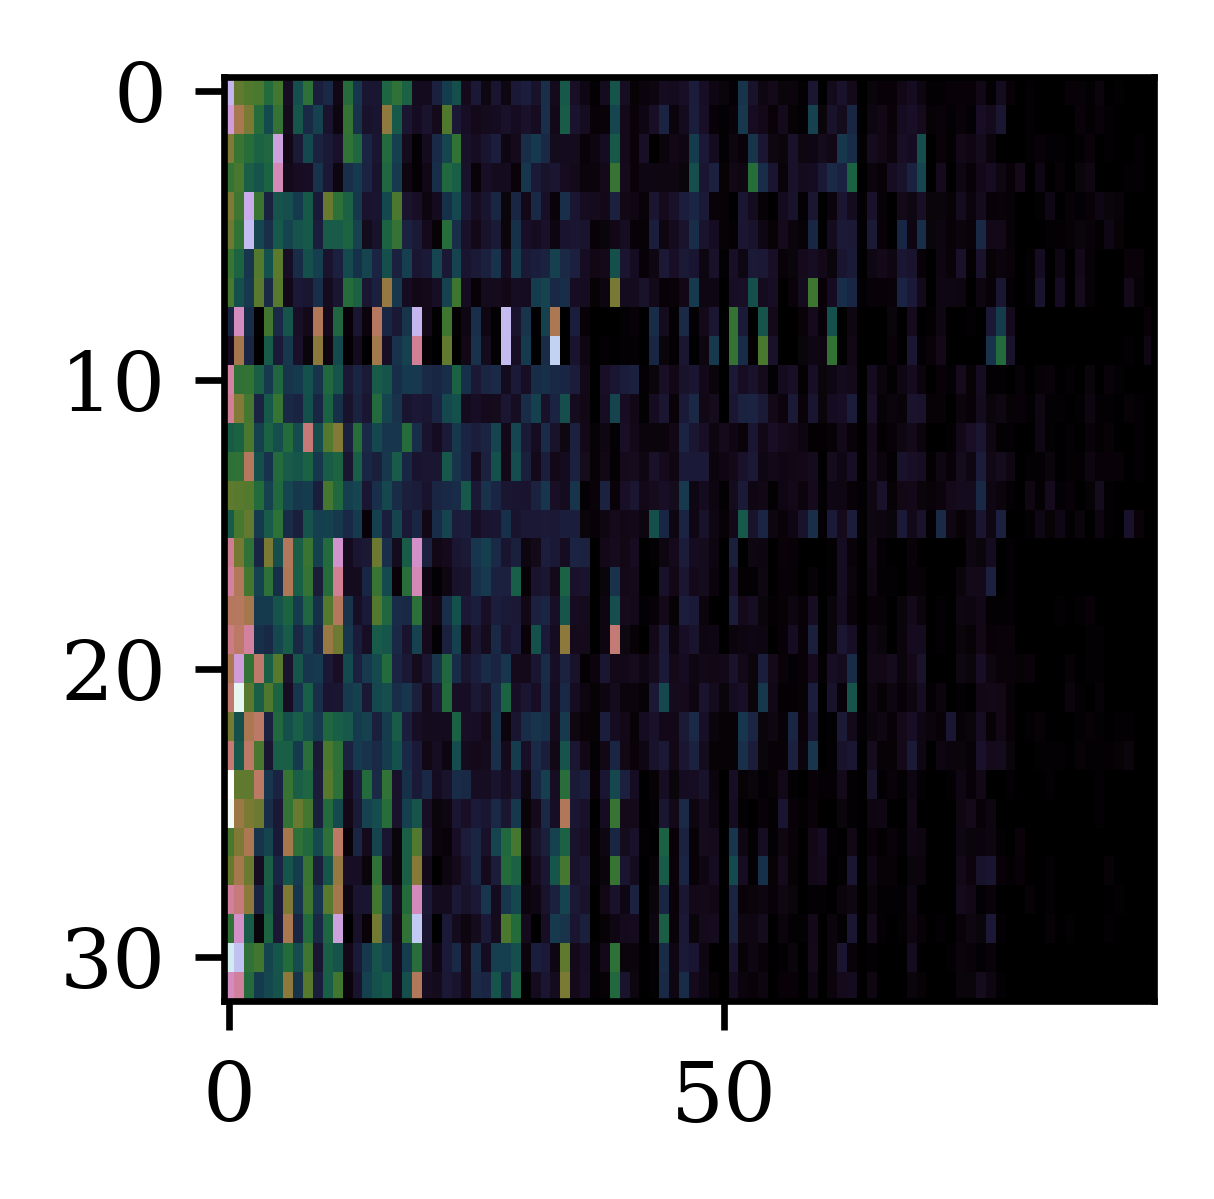

In [13]:
figure(2, 2)
plt.imshow(usage_mtx.astype(float), aspect='auto', cmap='cubehelix')

In [14]:
latents = PCA(n_components=2).fit_transform(usage_mtx)

In [15]:
le = LabelEncoder()
labels = le.fit_transform(usage_mtx.index.get_level_values('subject_name'))

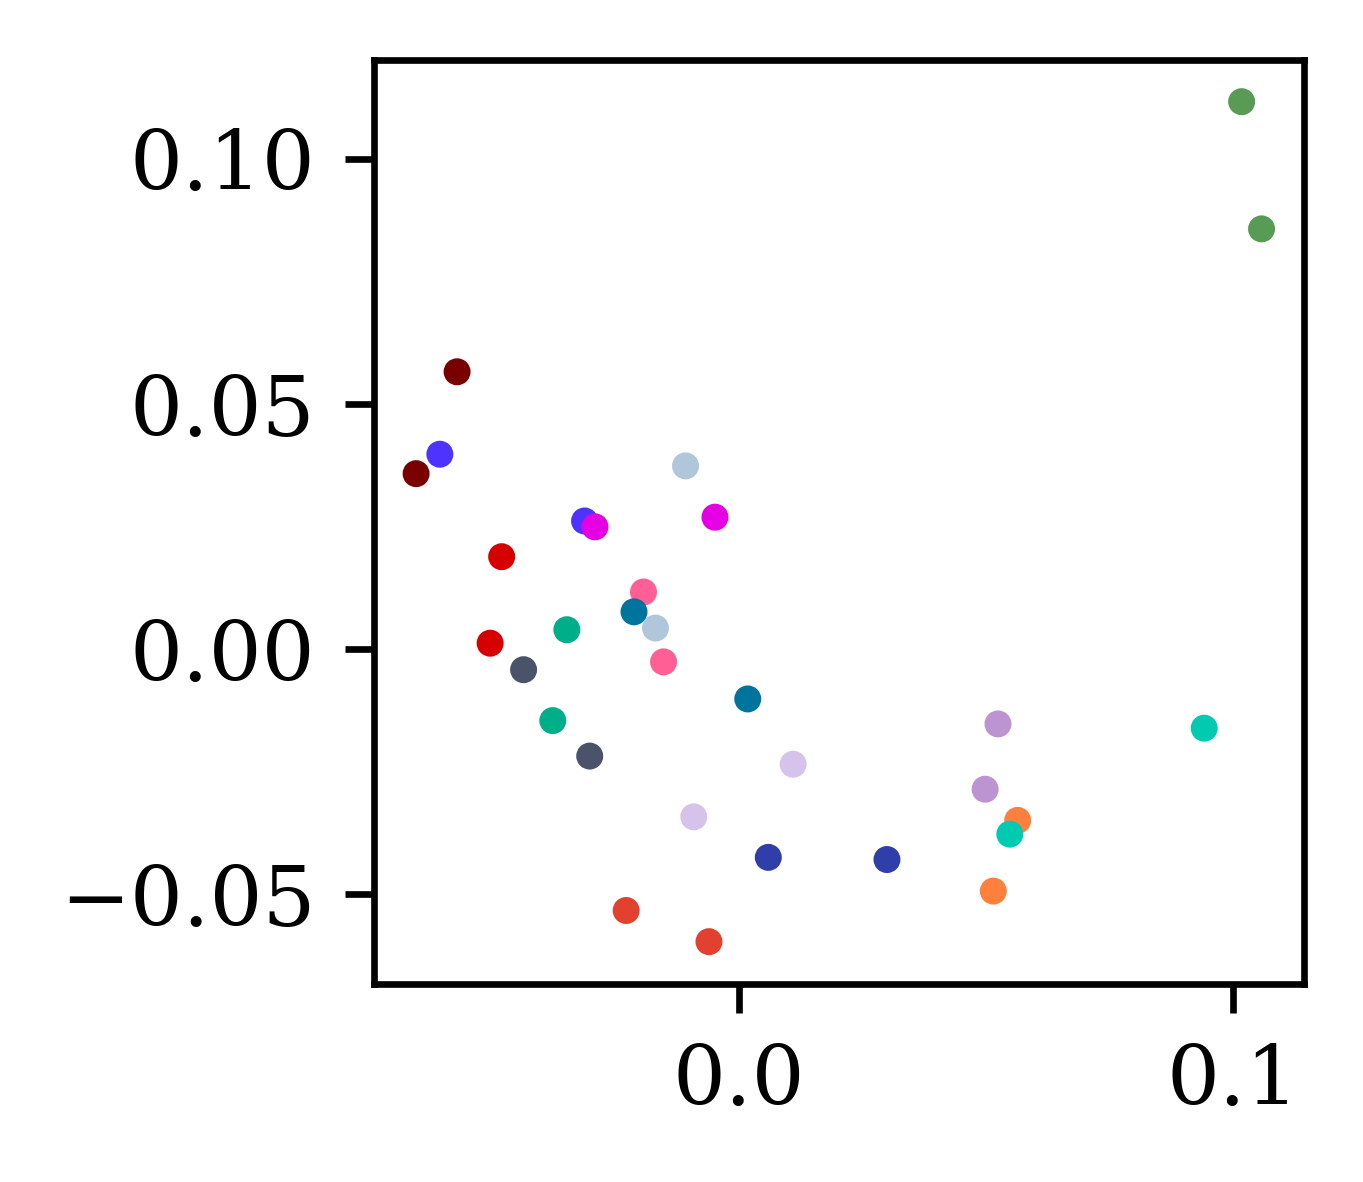

In [16]:
figure(2, 2)
plt.scatter(*latents.T, s=5, c=labels, cmap=cc.cm.glasbey)

In [17]:
l2 = labels.copy()
l2[l2 < 4] = 0
l2[(l2 >= 4) & (l2 < 8)] = 1
l2[(l2 >= 8) & (l2 < 12)] = 0
l2[(l2 >= 12) & (l2 < 16)] = 1

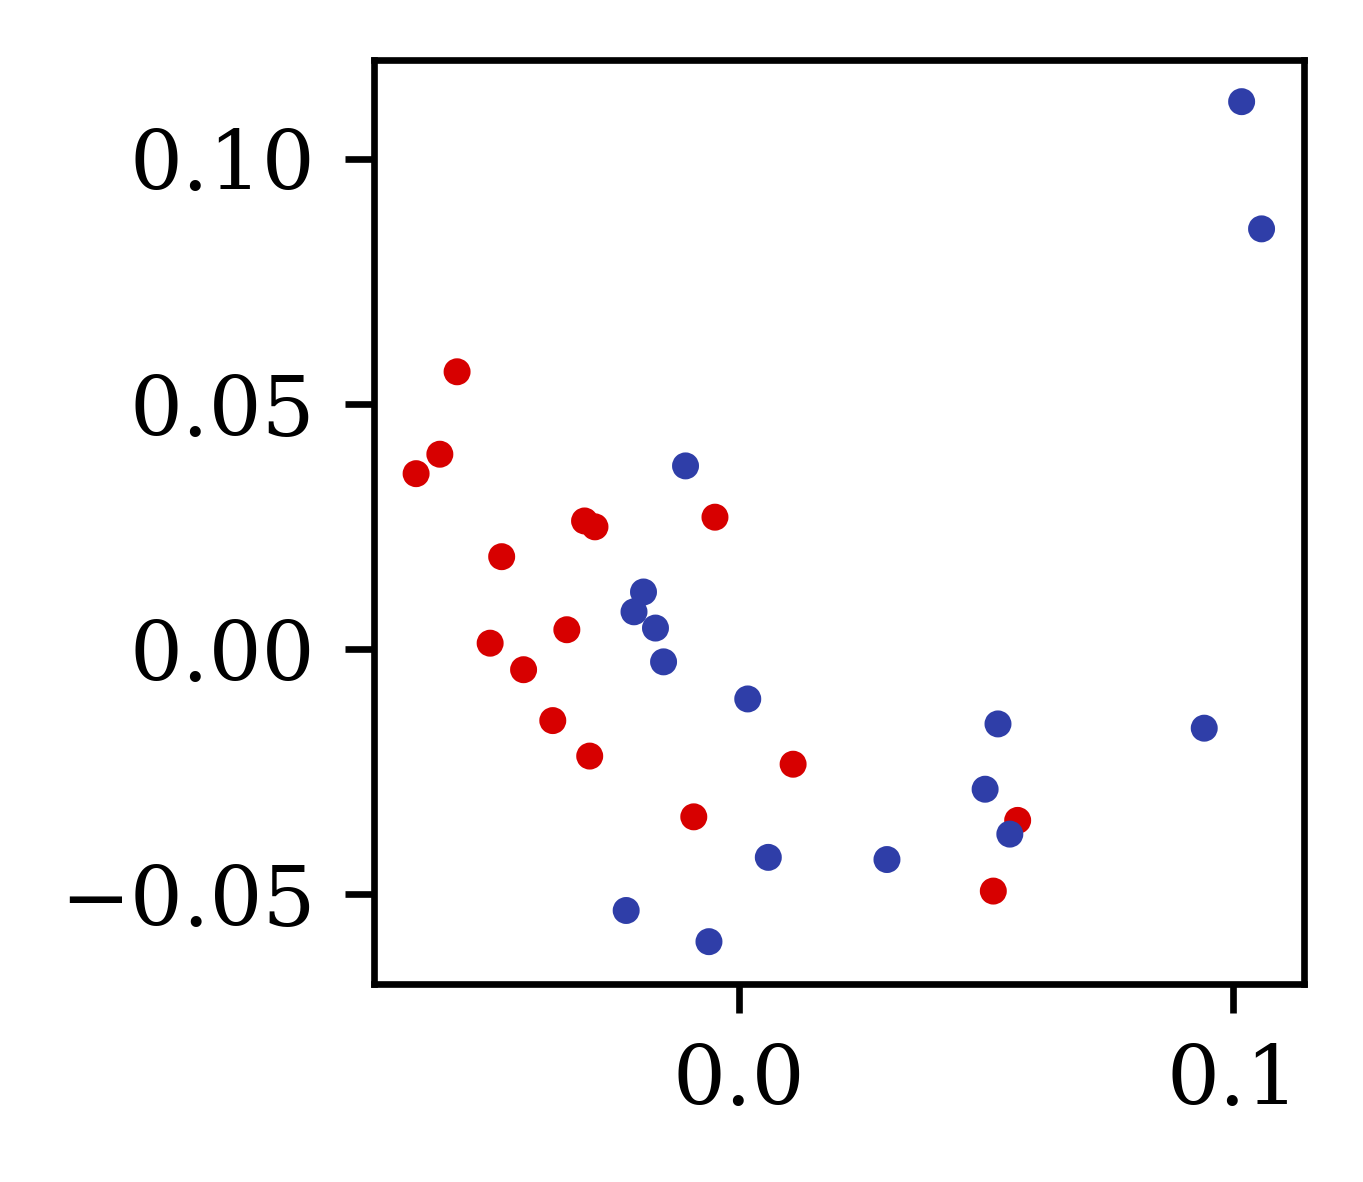

In [18]:
figure(2, 2)
# I *think* red is control and blue is klothos
plt.scatter(*latents.T, s=5, c=l2, cmap=cc.cm.glasbey, vmax=1)

In [19]:
b4a = l2.copy().astype(float)
b4a[1::2] += 0.5

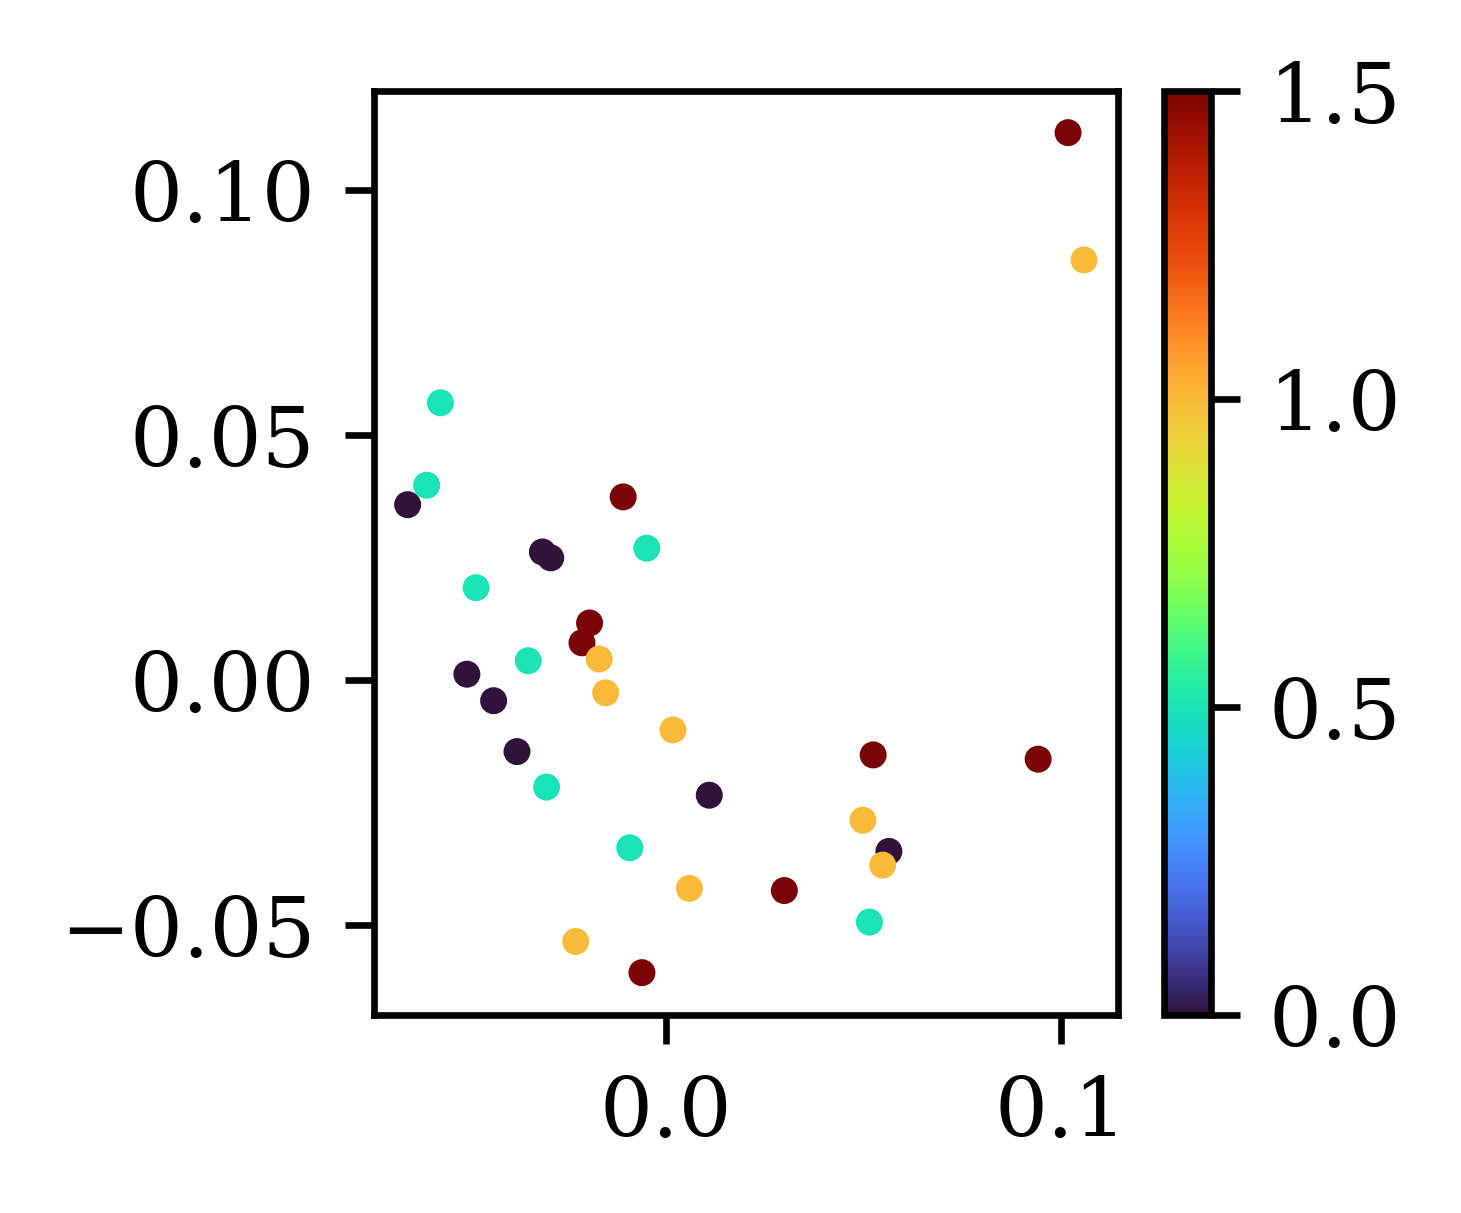

In [20]:
figure(2, 2)
# I *think* red is control and blue is klothos
plt.scatter(*latents.T, s=5, c=b4a, cmap='turbo')
plt.colorbar()

## Age regression

In [61]:
# pipeline = make_pipeline(StandardScaler(), PLSRegression(n_components=2))
pipeline = make_pipeline(StandardScaler(), PCA(n_components=2), KernelRidge(kernel='poly', alpha=0.63, degree=3, gamma=0.01))

In [62]:
pipeline.fit(ont_usage_mtx, ont_usage_mtx.index.get_level_values('age'))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kernelridge',
                 KernelRidge(alpha=0.63, gamma=0.01, kernel='poly'))])

In [63]:
preds = pipeline.predict(usage_mtx.reindex(columns=ont_usage_mtx.columns, fill_value=0))

In [64]:
preds

array([42.02375217, 42.47988854, 30.17802015, 24.71447075, 37.43934446,
       35.85301489, 38.25887584, 25.62373558, 55.42434622, 44.09529232,
       48.55193895, 41.36536098, 50.21833423, 39.13431139, 39.80773253,
       28.68048565, 75.15730228, 79.55758731, 61.20326914, 58.93319354,
       48.34017662, 54.10362351, 34.76322379, 42.26084765, 62.61711286,
       73.03139951, 78.01317516, 75.92669756, 75.09847524, 77.53978952,
       73.2688653 , 78.27219716])

In [65]:
age_pred = pd.Series(preds, index=usage_mtx.index, name='age_pred').reset_index()

In [66]:
exp_type = []
inj_type = []
for idx, row in age_pred.iterrows():
    masks = age_pred.loc[age_pred['subject_name'] == row.subject_name]
    masks.drop(index=idx)
    if masks['date'].iloc[0] < row.date:
        exp_type.append('after')
    else:
        exp_type.append('before')
    if int(row.subject_name.split('_')[1]) in [2, 4]:
        inj_type.append('klothos')
    else:
        inj_type.append('saline')

In [67]:
row.subject_name

'K90M_04_04'

In [68]:
age_pred['treatment_day'] = exp_type
age_pred['exp_type'] = inj_type

<Axes: xlabel='treatment_day', ylabel='age_pred'>

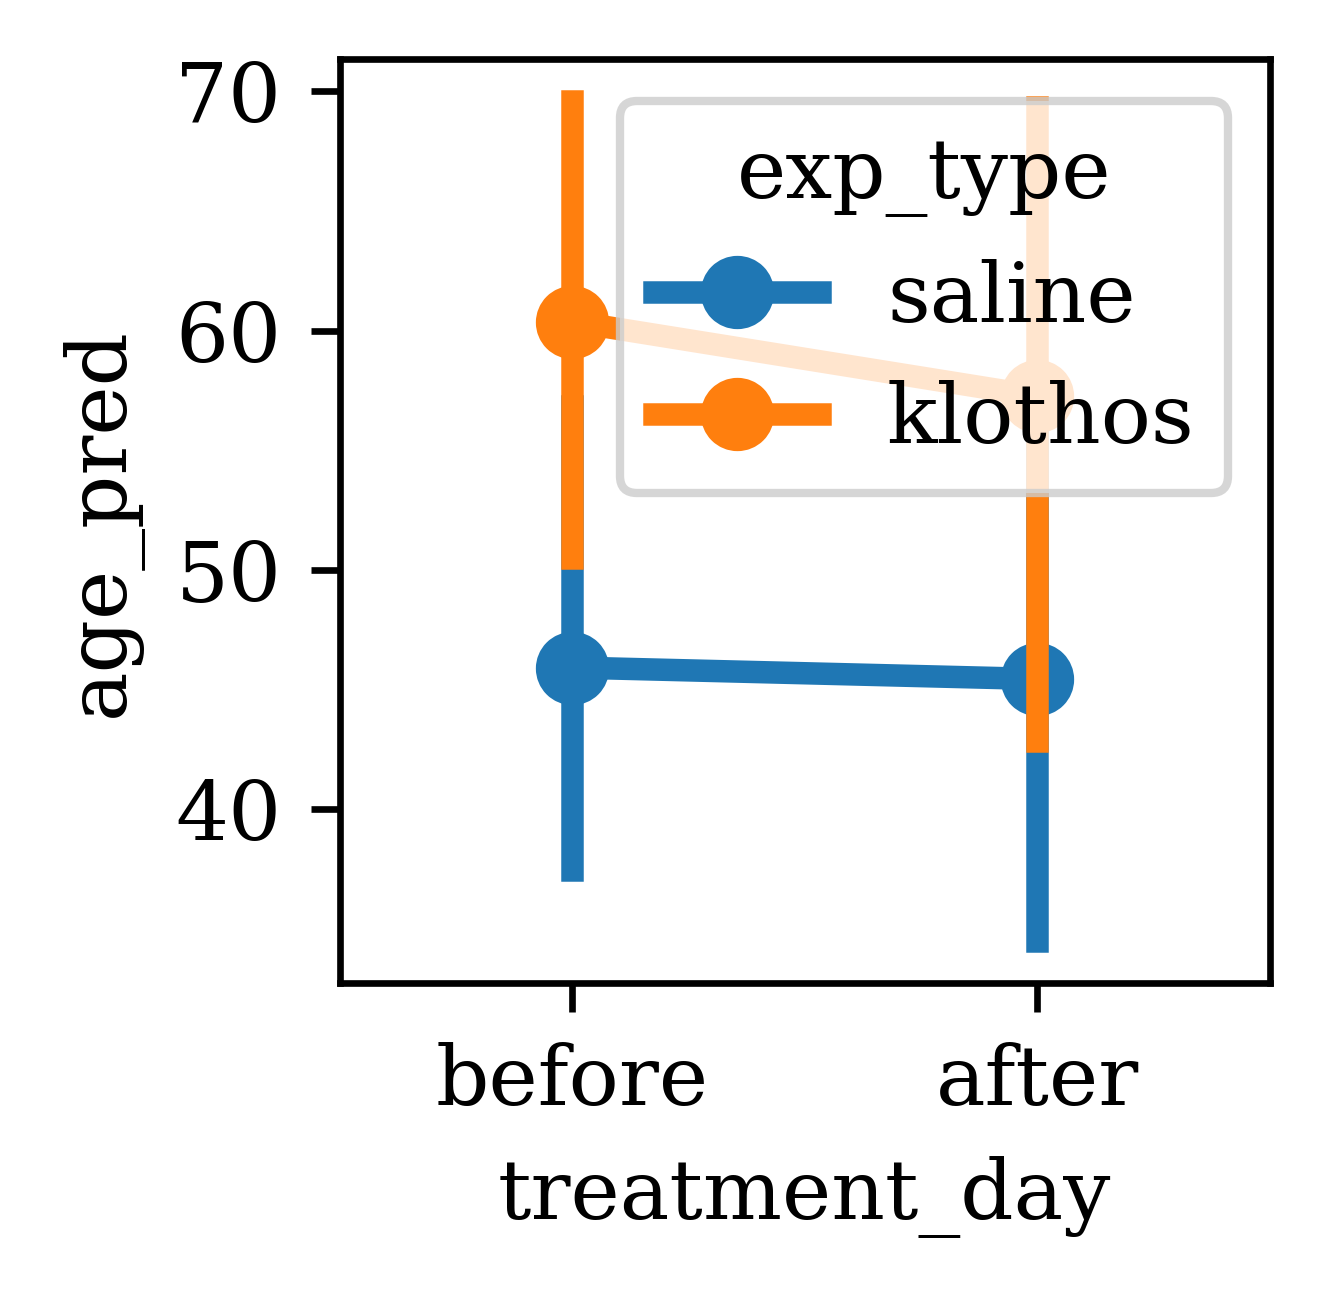

In [69]:
figure(2, 2)
sns.pointplot(data=age_pred, x='treatment_day', y='age_pred', hue='exp_type')

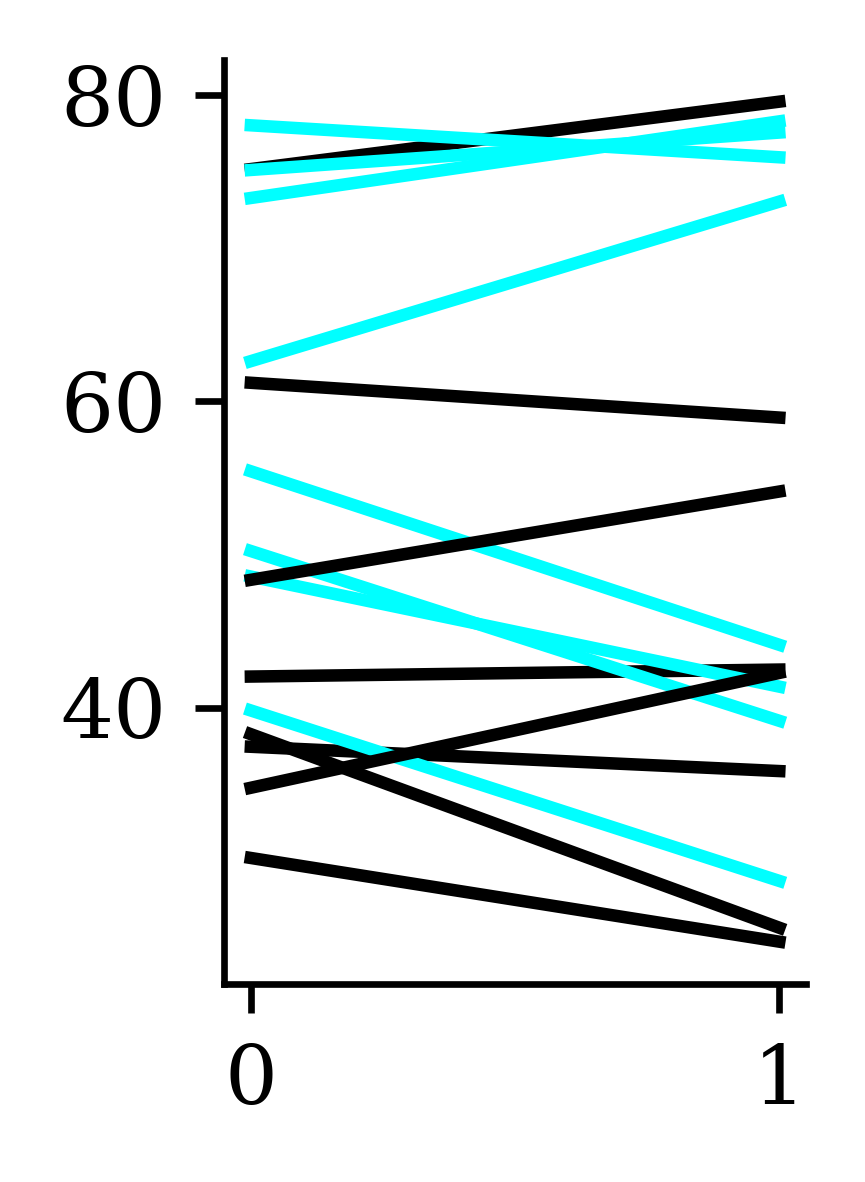

In [70]:
figure(1.25, 2)
for animal, _df in age_pred.groupby('subject_name'):
    plt.plot([0, 1], _df['age_pred'], c='k' if _df.iloc[0]['exp_type'] == 'saline' else 'cyan')
sns.despine()